In [2]:
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np
from statistics import stdev
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import itertools

In [3]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Creating features from audio files

In [4]:
header = 'filename rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [5]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [6]:
Instruments = 'flu pia tru org gac voi cel cla gel sax vio'.split()

for i in Instruments:
    for filename in os.listdir(f'./../IRMAS/IRMAS-TrainingData/{i}'):
        songname = f'./../IRMAS/IRMAS-TrainingData/{i}/{filename}'
        y, sr = librosa.load(songname, sr =44100)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {i}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [7]:
df = pd.read_csv('data.csv')
df.head()

,filename,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,[flu][cla]0441__1.wav,0.149752,2097.888099,2489.946539,3917.463313,0.044588,-183.342606,150.484238,-45.797676,31.572205,...,12.865310,5.979919,-0.760616,-2.864177,-10.078252,-9.153670,-5.919430,1.270639,-5.099973,flu
1,[flu][pop_roc]0372__1.wav,0.070092,1788.342987,3053.350599,3598.705395,0.024457,-266.117035,168.074860,8.713345,38.584534,...,0.733319,-3.077334,-3.865694,-7.703886,-7.980325,-0.265409,-0.590245,2.773574,-1.158271,flu
2,[flu][pop_roc]0489__3.wav,0.075266,1415.090142,1338.522972,2574.007601,0.044043,-260.943909,235.551620,-72.608337,1.650667,...,-4.480639,-4.898223,1.072633,8.016642,8.928833,3.030757,-6.311554,-13.654664,-10.805024,flu
3,061__[flu][dru][pop_roc]0419__2.wav,0.157308,1457.059728,2070.808325,2434.665329,0.035720,-223.190750,188.077667,-17.081148,22.657728,...,11.541116,8.014239,-9.074387,-9.779533,-8.943732,-7.005507,-2.292251,-2.062893,1.445740,flu
4,[flu][cla]0373__1.wav,0.048835,1903.336677,2381.898288,2342.879012,0.047959,-469.845367,92.393463,-23.503510,-9.021843,...,-23.929064,-29.581631,-23.973606,11.314720,24.038225,16.351347,-0.176797,-3.863950,-2.982665,flu


In [8]:
features = df[df.columns[2:26]]

# PCA Analysis

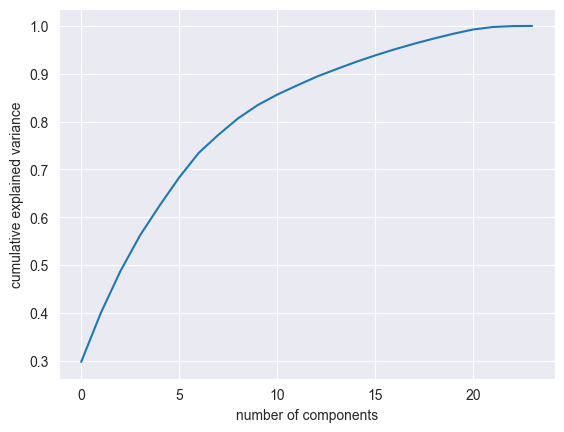

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
X = scale(features)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
# Dropping unnecessary columns
df = df.drop(['filename'],axis=1)
df1 = shuffle(df)
df1

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
5131,0.076020,2636.753197,2451.499984,4504.596442,0.090662,-197.281448,157.306061,-81.709755,45.777344,-0.864051,...,-6.236720,5.590684,-0.464900,0.818600,-5.257569,6.898026,-1.115159,-4.500498,-7.545817,gel
835,0.107184,3017.668435,3464.968757,6411.241026,0.060330,-192.671844,131.360611,-14.184958,46.895996,-7.494491,...,1.998248,-0.290145,5.367829,0.412997,-4.419425,-4.379714,-3.087277,0.903267,0.142536,pia
5354,0.127959,2583.699516,3119.079389,5296.419711,0.059859,-130.536743,163.668671,-46.598328,29.870743,-11.515231,...,-1.552958,-2.436309,5.123342,0.774083,-10.021901,-3.371148,-8.939274,-1.439774,-6.991382,gel
3732,0.058821,3708.385525,4106.255058,9467.126795,0.065403,-294.742920,114.498253,-36.088608,24.163553,-4.427538,...,-19.735760,14.960533,-1.982083,-6.879830,-1.323611,-18.964624,-3.673581,-2.068463,-14.619012,voi
4815,0.072517,3571.857994,3558.296844,7609.035842,0.091865,-167.661270,132.771606,-44.967190,63.773754,-33.528267,...,4.134146,0.844427,0.896289,2.869375,-8.898050,-5.149798,-12.451680,1.707735,-7.038354,gel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,0.164000,2379.403562,2897.337261,4997.033361,0.050953,-168.591431,156.109558,-31.985193,40.395473,-12.677487,...,12.262079,10.564720,2.074386,-0.986307,5.395571,0.764436,1.260478,8.408209,-1.202484,voi
890,0.061735,813.475170,1155.065553,1095.782306,0.027180,-371.190033,225.801315,41.017849,-17.770447,-10.005513,...,0.585743,-1.759868,5.197744,2.346280,-4.884742,-3.743935,-6.682622,-6.253453,-5.127935,pia
2657,0.022884,1728.082717,2101.888309,3598.705395,0.046956,-370.660889,169.201340,-27.150572,52.583614,-1.828191,...,-11.238031,-10.052669,-10.904175,-16.157148,-3.194479,-2.691405,-6.284945,-5.898408,-6.066071,gac
3702,0.051345,1223.340105,2136.775360,2223.324008,0.019516,-359.929047,181.093796,11.550741,47.315170,11.182838,...,7.652359,13.567492,-3.956020,10.526043,6.632537,-7.544616,0.693433,5.606884,-7.970447,voi


In [11]:
instru_list = df1.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [12]:
y

array([ 4,  6,  4, ...,  3, 10,  5])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM

In [14]:
svclassifier = SVC(probability=True, kernel='rbf', C = 10.0, gamma=0.1)
svclassifier.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1, probability=True)

## Save the Model


In [15]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svclassifier, file)
    
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
    
# Save the mapping (label encoder) for use in the software
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_train, y_train)
print("Validation score: {0:.2f} %".format(100 * score))


Validation score: 99.74 %


## Analyze model performance

In [16]:
# predicted_labels = svclassifier.predict(X_test)
Ypredict = pickle_model.predict(X_test)

In [17]:
print("Recall: ", recall_score(y_test, Ypredict,average=None))
print("Precision: ", precision_score(y_test, Ypredict,average=None))
print("F1-Score: ", f1_score(y_test, Ypredict, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, Ypredict,normalize=True), accuracy_score(y_test, Ypredict,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, Ypredict))

Recall:  [0.75641026 0.57425743 0.53932584 0.76612903 0.72058824 0.72727273
 0.688      0.62043796 0.67226891 0.60330579 0.72611465]
Precision:  [0.71084337 0.58       0.57831325 0.6884058  0.67123288 0.75167785
 0.67716535 0.72033898 0.66115702 0.60833333 0.73076923]
F1-Score:  [0.73291925 0.57711443 0.55813953 0.72519084 0.69503546 0.73927393
 0.68253968 0.66666667 0.66666667 0.60580913 0.7284345 ]
Accuracy: 0.68  , 908.0
Number of samples: 1341
[[ 59   4   3   2   0   0   1   2   1   5   1]
 [  4  58   6   3   3   3   6   5   9   3   1]
 [  0   6  48   9   1   5   4   2   2  10   2]
 [  1   3   2  95   5   0   6   3   2   1   6]
 [  3   3   4   2  98   5   3   2   5   3   8]
 [  2   5   3   4   9 112   3   1   6   5   4]
 [  0   4   3  11   5   6  86   5   3   1   1]
 [  4  10   2   2   2   0   4  85  10   9   9]
 [  1   4   3   4   2   8   6   5  80   4   2]
 [  8   2   5   5   7   2   4   5   2  73   8]
 [  1   1   4   1  14   8   4   3   1   6 114]]


## Confusion Matrix Visualization

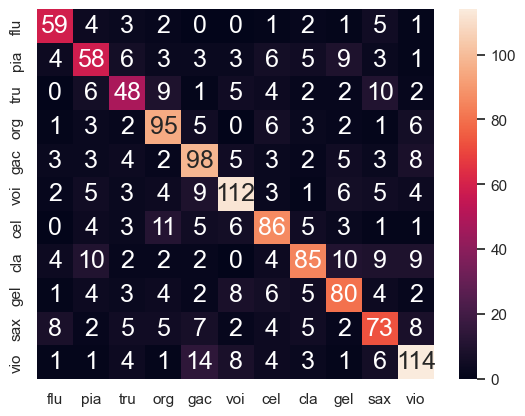

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, Ypredict),index=["flu", "pia", "tru", "org", "gac", "voi", "cel", "cla", "gel", "sax", "vio"], columns=["flu", "pia", "tru", "org", "gac", "voi", "cel", "cla", "gel", "sax", "vio"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()